In [1]:
from agents import *
from config import Config
from util import *
import matplotlib.pyplot as plt
c = Config()

In [2]:
out_single = simulate(T = 50000,config = c, save_path='test.pt')

In [3]:
out = simulate_batch(T = 50000, B = 10, config = c, save_path='test.pt')

In [23]:
out_cont = simulate_batch(T = 50000, B = 10, config = c, save_path='test_pt2.pt', continue_simulation='test.pt')

In [25]:
out_cont

({'v': tensor([[3, 0, 3,  ..., 6, 6, 9],
          [8, 3, 2,  ..., 2, 5, 9],
          [0, 3, 1,  ..., 7, 6, 3],
          ...,
          [0, 3, 0,  ..., 1, 1, 9],
          [3, 9, 8,  ..., 0, 8, 6],
          [6, 0, 0,  ..., 7, 4, 4]]),
  'p': tensor([[0.3596, 1.3203, 0.7334,  ..., 1.4805, 1.0000, 0.8931],
          [1.2139, 1.3203, 0.9468,  ..., 1.6934, 0.7334, 0.5732],
          [1.0537, 1.2666, 1.3203,  ..., 0.7866, 0.5195, 1.0000],
          ...,
          [0.8398, 1.0537, 1.0000,  ..., 0.8931, 0.8398, 1.1602],
          [0.7866, 1.5869, 0.7334,  ..., 0.4663, 1.5332, 1.1064],
          [0.8931, 1.1602, 0.7334,  ..., 1.3740, 0.4131, 1.0000]],
         dtype=torch.float16),
  'z': tensor([[ 320.2500, -160.1250,  133.3750,  ..., -240.1250,   -0.0000,
             53.3750],
          [-106.7500, -160.1250,   26.6875,  ..., -346.7500,  133.3750,
            213.5000],
          [ -26.6875, -133.3750, -160.1250,  ...,  106.7500,  240.1250,
             -0.0000],
          ...,
         

In [4]:
informed = out[1]['informed']
p = out[0]['p']
informed.p_discrete

tensor([0.1995, 0.2529, 0.3063, 0.3596, 0.4130, 0.4664, 0.5197, 0.5731, 0.6264,
        0.6798, 0.7332, 0.7865, 0.8399, 0.8933, 0.9466, 1.0000, 1.0534, 1.1067,
        1.1601, 1.2135, 1.2668, 1.3202, 1.3736, 1.4269, 1.4803, 1.5336, 1.5870,
        1.6404, 1.6937, 1.7471, 1.8005])

In [5]:
y = out[0]['y']
min(y.view(-1))
max(y.view(-1))

tensor(343., dtype=torch.float16)

In [6]:
mm = out_single[1]['market_maker']
for y in range(-350,350,10):
    price = mm.determine_price(y)
    print(f"y: {y}, price: {price}")

y: -350, price: 1.6917836537698858
y: -340, price: 1.671783661417962
y: -330, price: 1.6517836690660381
y: -320, price: 1.6317836767141145
y: -310, price: 1.6117836843621909
y: -300, price: 1.5917836920102668
y: -290, price: 1.5717836996583432
y: -280, price: 1.5517837073064196
y: -270, price: 1.5317837149544957
y: -260, price: 1.5117837226025719
y: -250, price: 1.4917837302506483
y: -240, price: 1.4717837378987244
y: -230, price: 1.4517837455468006
y: -220, price: 1.431783753194877
y: -210, price: 1.411783760842953
y: -200, price: 1.3917837684910292
y: -190, price: 1.3717837761391056
y: -180, price: 1.3517837837871818
y: -170, price: 1.331783791435258
y: -160, price: 1.3117837990833343
y: -150, price: 1.2917838067314105
y: -140, price: 1.2717838143794868
y: -130, price: 1.251783822027563
y: -120, price: 1.2317838296756394
y: -110, price: 1.2117838373237155
y: -100, price: 1.1917838449717917
y: -90, price: 1.171783852619868
y: -80, price: 1.1517838602679442
y: -70, price: 1.13178386791

In [26]:
mm = out_cont[1]['market_maker']
for y in range(-350,350,10):
    price = mm.determine_price(y)
    print(f"y: {y}, price: {price}")


y: -350, price: tensor([1.7171, 1.7061, 1.7123, 1.7184, 1.6961, 1.7108, 1.7127, 1.7024, 1.7193,
        1.7093])
y: -340, price: tensor([1.6971, 1.6861, 1.6923, 1.6984, 1.6761, 1.6908, 1.6927, 1.6824, 1.6993,
        1.6893])
y: -330, price: tensor([1.6771, 1.6661, 1.6723, 1.6784, 1.6561, 1.6708, 1.6727, 1.6624, 1.6793,
        1.6693])
y: -320, price: tensor([1.6571, 1.6461, 1.6523, 1.6584, 1.6361, 1.6508, 1.6527, 1.6424, 1.6593,
        1.6493])
y: -310, price: tensor([1.6371, 1.6261, 1.6323, 1.6384, 1.6161, 1.6308, 1.6327, 1.6224, 1.6393,
        1.6293])
y: -300, price: tensor([1.6171, 1.6061, 1.6123, 1.6184, 1.5961, 1.6108, 1.6127, 1.6024, 1.6193,
        1.6093])
y: -290, price: tensor([1.5971, 1.5861, 1.5923, 1.5984, 1.5761, 1.5908, 1.5927, 1.5824, 1.5993,
        1.5893])
y: -280, price: tensor([1.5771, 1.5661, 1.5723, 1.5784, 1.5561, 1.5708, 1.5727, 1.5624, 1.5793,
        1.5693])
y: -270, price: tensor([1.5571, 1.5461, 1.5523, 1.5584, 1.5361, 1.5508, 1.5527, 1.5424, 1.5593,


In [4]:
informed.v_discrete

tensor([-0.6449, -0.0364,  0.3255,  0.6147,  0.8743,  1.1257,  1.3853,  1.6745,
         2.0364,  2.6449])

(array([1.11128889, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.11877778, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.11104444, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.09806667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.11564444,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.11515556, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.10717778, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

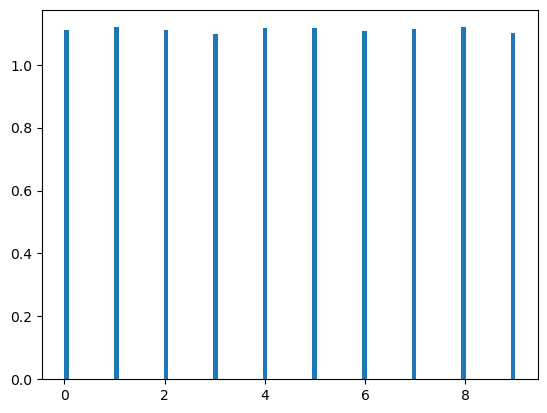

In [7]:
v = out[0]['v']
plt.hist(v.view(-1).numpy(), bins=100, density=True)

(array([0.95271523, 0.        , 0.        , 1.24748351, 0.        ,
        0.        , 0.        , 1.2816887 , 0.        , 0.        ,
        0.        , 1.45185235, 0.        , 0.        , 0.        ,
        1.626112  , 0.        , 0.        , 0.        , 1.92277943,
        0.        , 0.        , 0.        , 2.07158731, 0.        ,
        0.        , 2.48202971, 0.        , 0.        , 0.        ,
        2.77369821, 0.        , 0.        , 0.        , 3.51246629,
        0.        , 0.        , 0.        , 3.90070857, 0.        ,
        0.        , 0.        , 3.99077517, 0.        , 0.        ,
        0.        , 4.28982857, 0.        , 0.        , 0.        ,
        4.893696  , 0.        , 0.        , 3.8535168 , 0.        ,
        0.        , 0.        , 3.812352  , 0.        , 0.        ,
        0.        , 3.54567314, 0.        , 0.        , 0.        ,
        3.36237714, 0.        , 0.        , 0.        , 3.21375086,
        0.        , 0.        , 0.        , 2.95

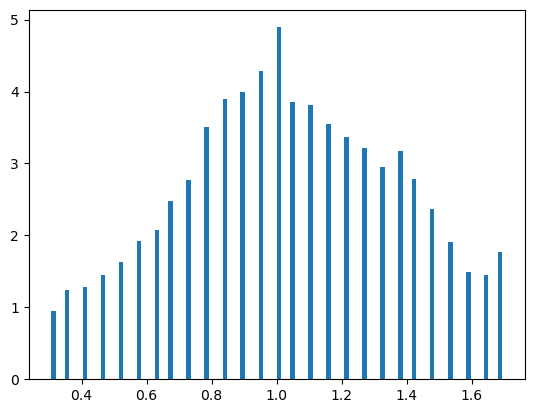

In [27]:
p = out_cont[0]['p']
plt.hist(p.view(-1).numpy(), bins=100, density=True)

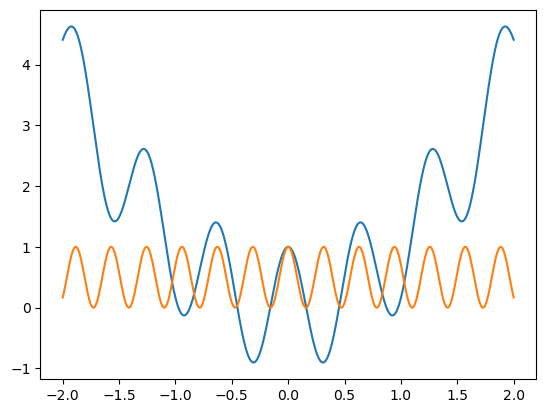

In [22]:
x = np.linspace(-2,2,1000)
def f(x):
    return x**2
def g(x):
    return np.cos(x*10)

plt.plot(x, f(x) + g(x), label='f(x) + g(x)')
plt.plot(x, f(g(x)))

In [28]:
out_cont[0]['convergence_counter']

tensor([[ 0,  0],
        [ 0,  0],
        [ 1,  1],
        [ 0,  0],
        [11, 11],
        [ 1,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 2,  2]], dtype=torch.int16)

In [9]:
out[0]['profit']

tensor([[[ 1.0492e+01,  7.9805e+00,  3.0527e+00,  ...,  3.4497e-01,
           2.3828e+01,  0.0000e+00],
         [ 0.0000e+00,  6.1377e-01,  7.1250e+00,  ...,  1.3799e+00,
           2.3828e+01,  0.0000e+00]],

        [[ 2.3797e+01,  5.1602e+00,  4.6992e+00,  ..., -9.2031e+00,
          -9.1357e-01,  0.0000e+00],
         [ 5.2891e+00,  1.0322e+00,  1.8797e+01,  ..., -0.0000e+00,
          -7.3086e+00,  0.0000e+00]],

        [[ 6.1484e+00,  7.4258e+00,  9.8047e-01,  ..., -8.1543e-01,
           1.7432e-01,  0.0000e+00],
         [ 1.8438e+00,  1.4852e+01,  9.8047e+00,  ..., -5.0195e-01,
           5.8105e-01,  0.0000e+00]],

        ...,

        [[ 5.5312e+00,  6.5977e+00,  3.4707e+00,  ...,  6.0107e-01,
           1.6344e+01,  0.0000e+00],
         [ 0.0000e+00,  1.9797e+01,  0.0000e+00,  ...,  7.2148e+00,
           1.6344e+01,  0.0000e+00]],

        [[ 1.4633e+01, -0.0000e+00,  7.3625e+01,  ...,  1.5172e+01,
           1.7703e+01,  0.0000e+00],
         [ 5.6289e+00, -1.4234e+0

In [10]:
sc = out[1]['informed'].state_count
sc.shape

torch.Size([10, 2, 31, 10])

In [13]:
sc_avg = torch.mean(sc.to(torch.float32), dim = (0,1))

In [14]:
sc_avg

tensor([[352.7000, 348.7000, 350.0000, 347.3000, 348.6000, 344.2000, 345.7000,
         349.5000, 358.2000, 343.6000],
        [ 57.2000,  59.7000,  52.3000,  55.5000,  56.9000,  54.7000,  57.3000,
          55.6000,  52.7000,  51.6000],
        [104.4000,  99.5000, 105.4000,  94.1000, 101.9000, 100.5000, 100.9000,
         103.5000, 109.9000,  95.7000],
        [123.2000, 116.2000, 116.8000, 117.3000, 116.3000, 120.4000, 110.3000,
         116.6000, 122.6000, 113.6000],
        [108.1000, 112.6000, 109.4000, 100.3000, 114.0000, 109.0000, 113.8000,
         110.4000, 103.1000, 102.6000],
        [106.0000, 118.4000, 112.5000, 108.7000, 115.1000, 114.7000, 114.7000,
         117.3000, 109.4000, 113.2000],
        [121.5000, 119.7000, 119.9000, 121.7000, 128.6000, 125.3000, 120.3000,
         119.4000, 123.2000, 121.8000],
        [131.2000, 139.6000, 138.1000, 125.8000, 128.7000, 134.4000, 133.3000,
         136.6000, 133.1000, 132.1000],
        [144.0000, 142.7000, 141.6000, 139.1000,

In [15]:
out[1]['informed'].convergence_counter

tensor([[1, 1],
        [8, 5],
        [4, 0],
        [4, 6],
        [0, 0],
        [0, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 6]], dtype=torch.int16)

In [5]:
a = InformedAgent(c)

In [6]:
a.x_n

166.66663333334233

In [7]:
a.x_m

124.999950000016